In [296]:
# Pandas for managing datasets
import pandas as pd
# Seaborn for plotting and styling
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import hvplot.pandas


%matplotlib inline

import scipy.stats as stats

import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [297]:
df = pd.read_csv("/Users/nataliaagudelo/Desktop/Classes/thinkful/DataScienceBootCamp/Unit2/Metro_Interstate_Traffic_Volume.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/12 9:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/12 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/12 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/12 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/12 13:00,4918


In [298]:
df['date_time'] = pd.to_datetime(df.date_time)

In [299]:
df.dtypes;

In [300]:
df['Year'] = df.date_time.dt.year
df['Month'] = df.date_time.dt.month
df['Day'] = df.date_time.dt.day
df['Hour'] = df.date_time.dt.hour
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13


In [301]:
df.drop("date_time", axis=1, inplace= True)

In [302]:
# Lookign for missing data
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
Year                   0
Month                  0
Day                    0
Hour                   0
dtype: int64

In [303]:
# Take a look at the data types to know how to manipulate them
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
traffic_volume           int64
Year                     int64
Month                    int64
Day                      int64
Hour                     int64
dtype: object

# Exploring the Data

This dataset contains three categorical variables, six continuous variables and no missing data, as seen bellow. 


## Attribute Information

holiday : Categorical US National holidays plus regional holiday, Minnesota State Fair 
Temperature (temp): Numeric Average temp in kelvin 
Rain (rain_1h): Numeric Amount in mm of rain that occurred in the hour 
Snow (snow_1h): Numeric Amount in mm of snow that occurred in the hour 
Cloud coverage (clouds_all): Numeric Percentage of cloud cover 
Weather (weather_main): Categorical Short textual description of the current weather 
Weather_description: Categorical Longer textual description of the current weather 
date_time : DateTime Hour of the data collected in local CST time 
traffic_volume : Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The latter is the outcome variable. In addition, weather_description inserts redundancy with litle extra information compared to weather_main, therefore, its droped from the dataset. 

In [304]:
# Drop weather description column
df.drop("weather_description", axis=1, inplace= True);

In [305]:
# None looks like a no data name, change to regular (regular day/no holiday)
df = df.replace({"holiday" :'None'},'Regular');

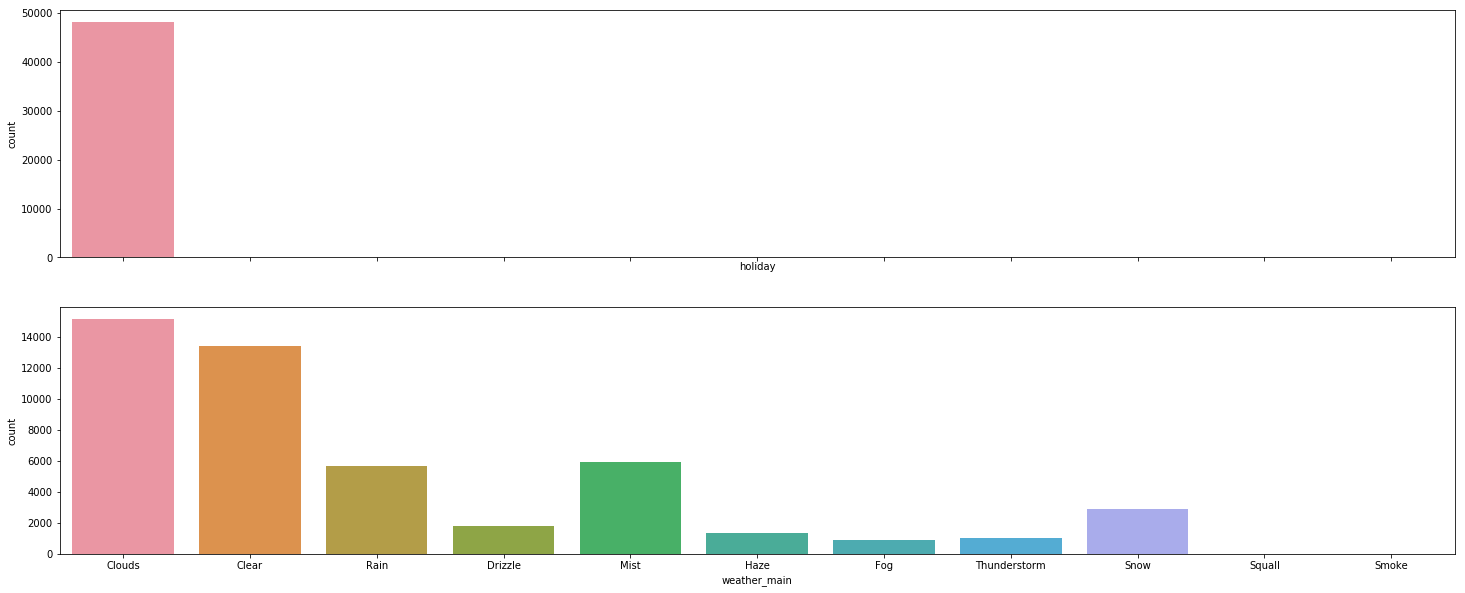

In [306]:
# Univariate analysis
# Looking at the categorical values independently

# visualizing ocurrance of holidays and weather
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)
sns.countplot(df["holiday"], data=df, ax=ax[0])
sns.countplot(df["weather_main"], data=df, ax=ax[1])
plt.show()

It is difficult to see the count of holidays due to the big count of regular days.

Visualize holidays only


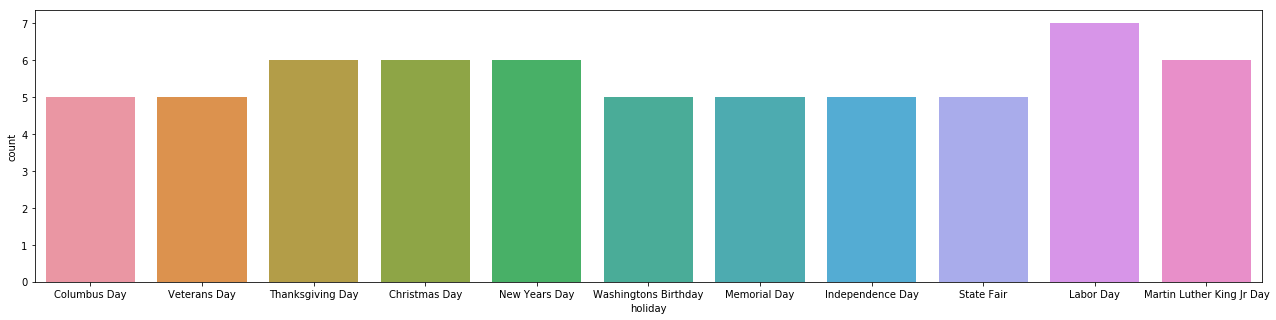

In [307]:
# Plot only holidays
df_holi = df[df.holiday != "Regular"]

plt.figure(figsize=(22, 5))
sns.countplot(x="holiday", data=df_holi)
plt.show()

The target data is the traffic volume.
Assing the target to a dataframe and the other variables to a second data frame
The independent variables are both categorical, continues, and date time data 
assign a different dataframe to each of the categories for pre-processing

In [308]:
# Rename columns for easier use
df.rename({'rain_1h':'rain', 'snow_1h':'snow', 'clouds_all':'clouds', 'weather_main':'weather'}, axis=1, inplace=True);

In [309]:
X_cate = df[['holiday', 'weather']];

In [310]:
# Select all columns witn numeric values and run histogram
# leave target variable out
X_nume = df.select_dtypes([np.int, np.float])
X_nume = X_nume.drop('traffic_volume', axis=1);

In [311]:
Y_target = df['traffic_volume'];

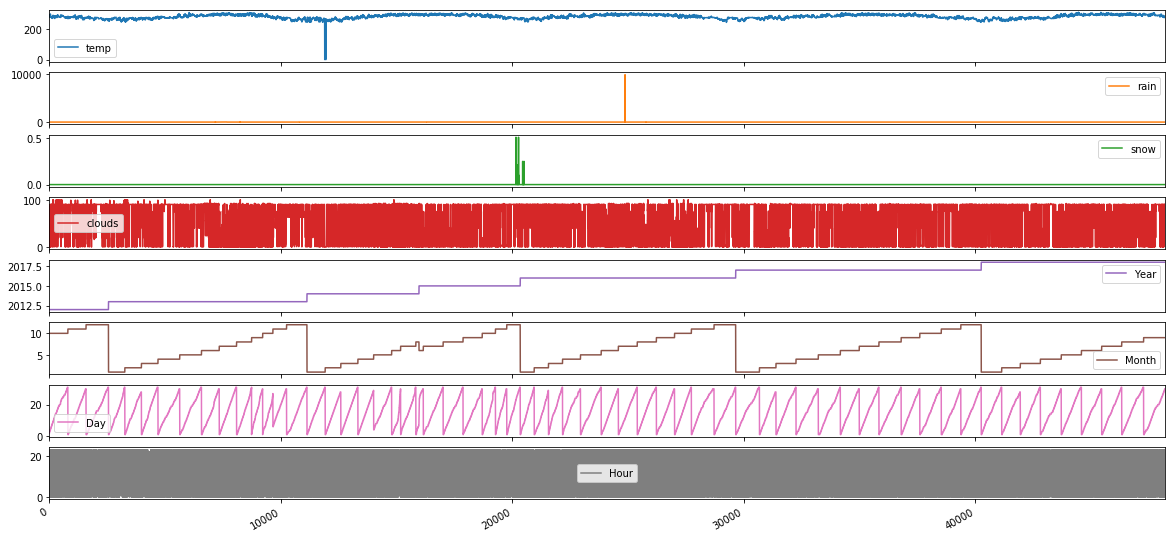

In [312]:
X_nume.plot(subplots=True, figsize=(20, 10))
plt.show()

In [313]:
X_nume['temp'].describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

In [314]:
# This data is in Kelving and it can not be a -459.67 Fahrenheits in Minnesota
# Drop the zeros
X_nume[(X_nume['temp'] == 0)].count()

temp      10
rain      10
snow      10
clouds    10
Year      10
Month     10
Day       10
Hour      10
dtype: int64

In [315]:
X_nume['rain'].describe()

count    48204.000000
mean         0.334264
std         44.789133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain, dtype: float64

In [316]:
# this looks like a typo
# Drop data above 9000
X_nume[(X_nume['rain'] > 9000)].count()

temp      1
rain      1
snow      1
clouds    1
Year      1
Month     1
Day       1
Hour      1
dtype: int64

In [317]:
X_nume['snow'].describe()

count    48204.000000
mean         0.000222
std          0.008168
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow, dtype: float64

In [318]:
X_nume[(X_nume['snow'] == 0)].count()

temp      48141
rain      48141
snow      48141
clouds    48141
Year      48141
Month     48141
Day       48141
Hour      48141
dtype: int64

Drop snow

In [319]:
# Drop snow column
X_nume.drop("snow", axis=1, inplace= True)
X_nume.head();

In [320]:
X_nume = X_nume[(X_nume.temp != 0) & (X_nume.rain < 9000)]
X_nume.describe()

,temp,rain,clouds,Year,Month,Day,Hour
count,48193.000000,48193.000000,48193.000000,48193.000000,48193.000000,48193.000000,48193.000000
mean,281.263786,0.130342,49.371942,2015.512730,6.507045,15.738178,11.399353
std,12.709364,1.003480,39.013548,1.893301,3.399867,8.721451,6.940353
min,243.390000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,272.180000,0.000000,1.000000,2014.000000,4.000000,8.000000,5.000000
50%,282.460000,0.000000,64.000000,2016.000000,7.000000,16.000000,11.000000
75%,291.810000,0.000000,90.000000,2017.000000,9.000000,23.000000,17.000000
max,310.070000,55.630000,100.000000,2018.000000,12.000000,31.000000,23.000000


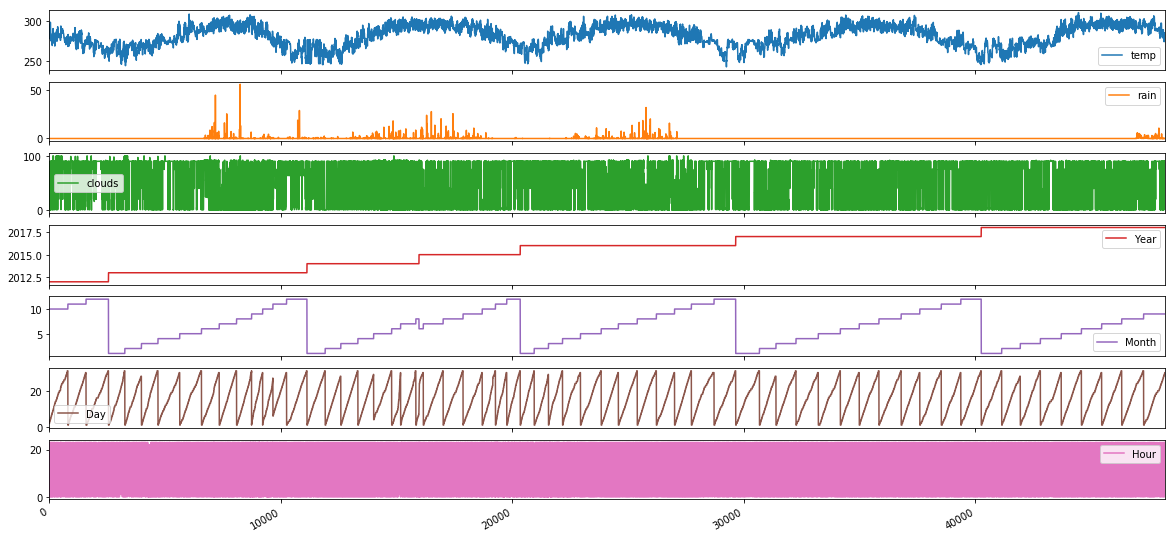

In [321]:
X_nume.plot(subplots=True, figsize=(20, 10))
plt.show()

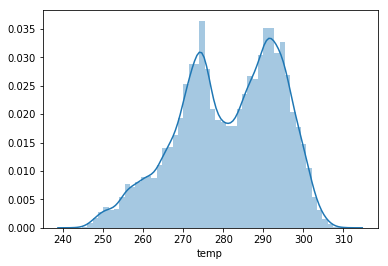

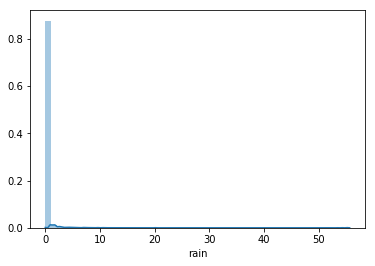

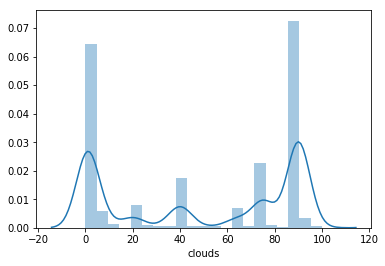

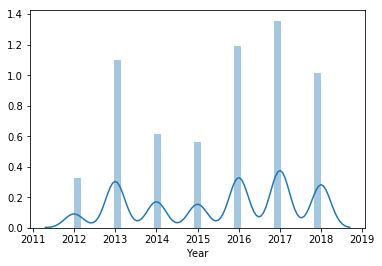

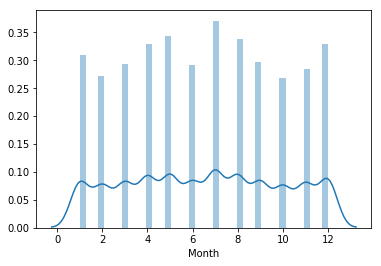

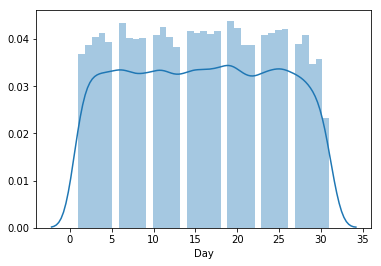

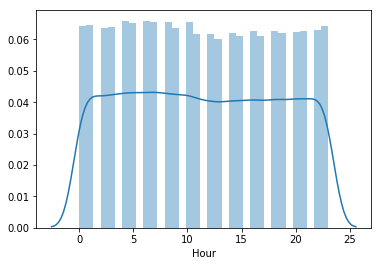

In [322]:
for i, col in enumerate(X_nume.columns):
    plt.figure(i)
    sns.distplot(X_nume[col])

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales


In [259]:
# Normalize data (length fo 1)
#scaler = preprocessing.MinMaxScaler()

In [264]:
# Make suere to separate array into input and output components before normalizing the data
#tempo_nume = X_nume.loc[ : ,'temp':'clouds']
#normalizedX = scaler.fit_transform(tempo_nume)
#normalizedX
#tempo_nume

In [265]:
#df_norm = pd.DataFrame(normalizedX)
#df_norm.columns = ['temp', 'rain', 'clouds']
#df_norm.head()

In [266]:
#df_norm.plot(subplots=True)
#plt.show()

In [267]:
#sns.pairplot(df_norm)
#plt.show()

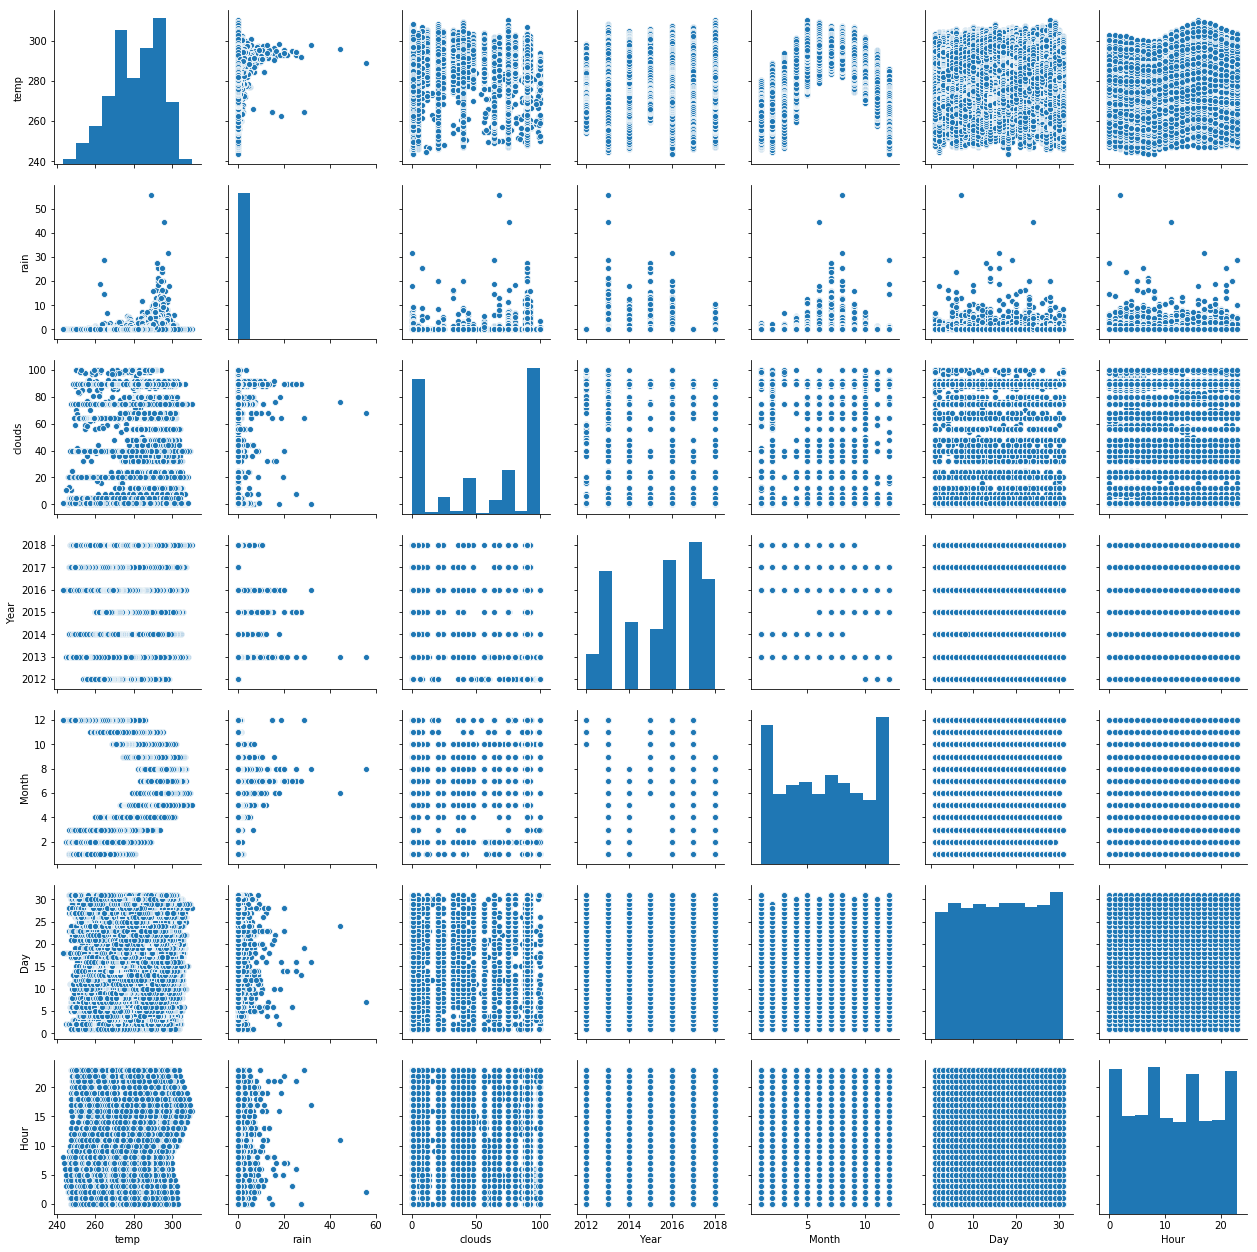

In [254]:
sns.pairplot(X_nume)
plt.show()

            temp      rain    clouds      Year     Month       Day      Hour
temp    1.000000  0.089920 -0.112885  0.137971  0.228255  0.022937  0.113465
rain    0.089920  1.000000  0.081485 -0.032646  0.028364  0.008011 -0.011376
clouds -0.112885  0.081485  1.000000 -0.073091 -0.009518  0.048077  0.054183
Year    0.137971 -0.032646 -0.073091  1.000000 -0.158973  0.012159 -0.007698
Month   0.228255  0.028364 -0.009518 -0.158973  1.000000  0.008595  0.001589
Day     0.022937  0.008011  0.048077  0.012159  0.008595  1.000000 -0.009390
Hour    0.113465 -0.011376  0.054183 -0.007698  0.001589 -0.009390  1.000000


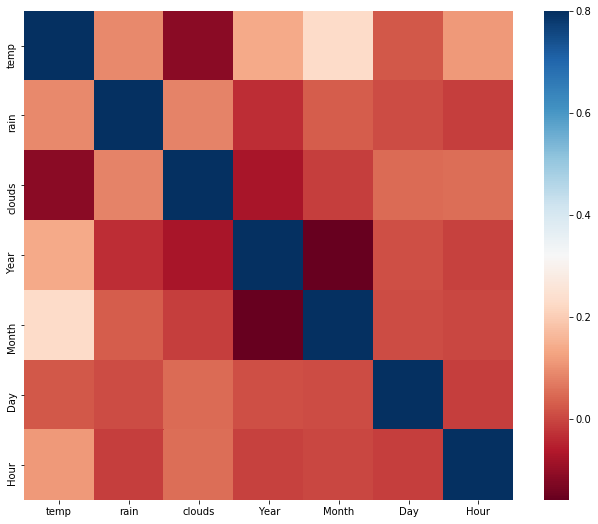

In [291]:
# Make the correlation matrix.
corrmat = X_nume.corr()
print(corrmat)

# Draw the heatmap using seaborn.
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdBu')
plt.show()

# Heatmaps are a great way to get a quick visual read on a big correlation matrix.
# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


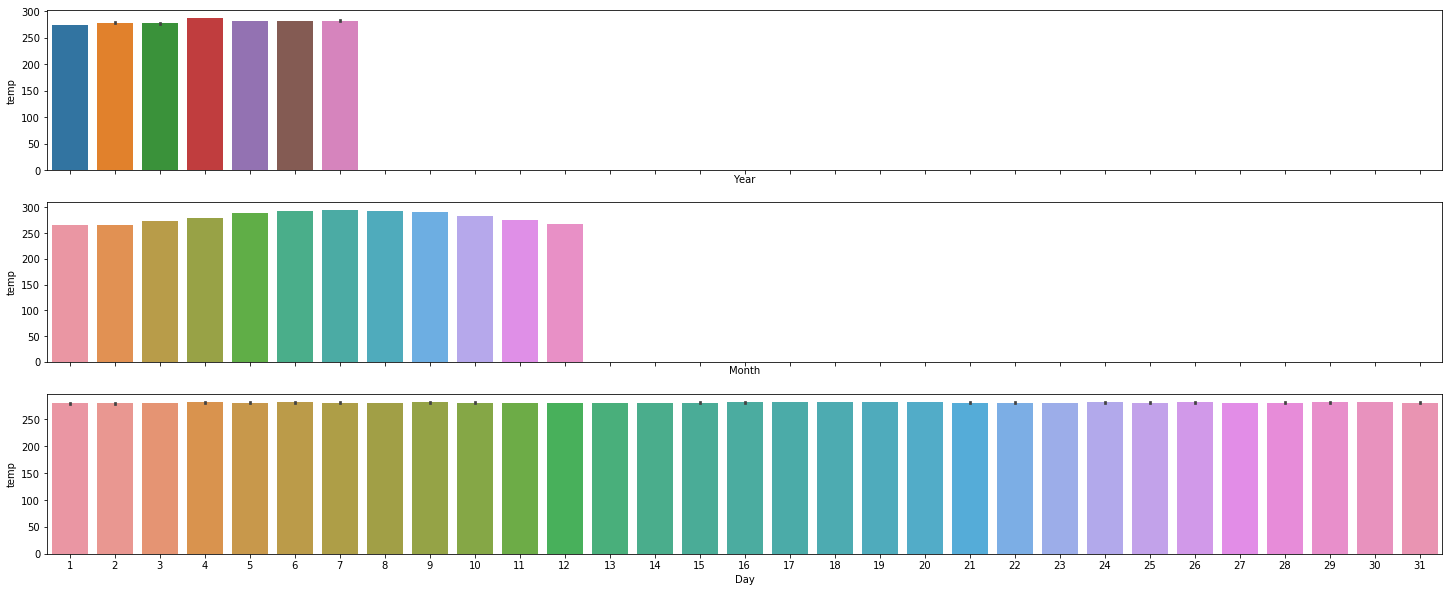

In [277]:
# Datetime data
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='Year', y='temp', data=X_nume, ax=ax[0])
sns.barplot(x="Month", y='temp',  data=X_nume, ax=ax[1])
sns.barplot(x='Day', y='temp', data=X_nume, ax=ax[2])
plt.show()

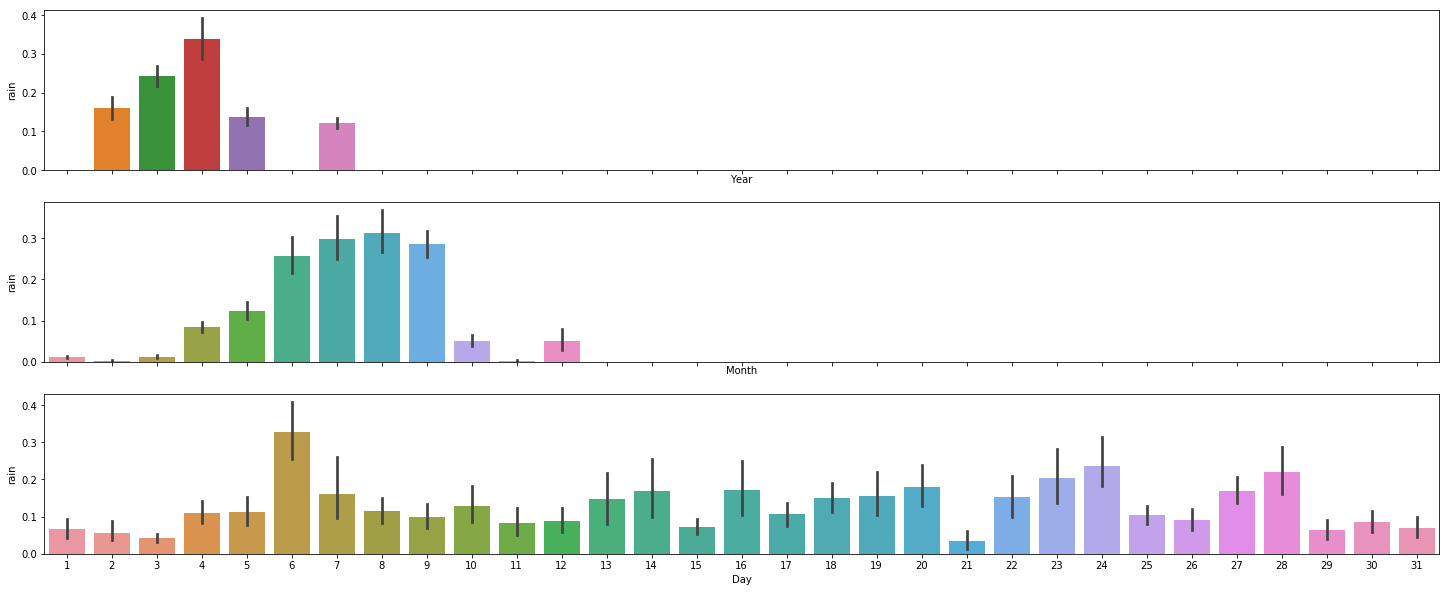

In [278]:
# Datetime data
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='Year', y='rain', data=X_nume, ax=ax[0])
sns.barplot(x="Month", y='rain',  data=X_nume, ax=ax[1])
sns.barplot(x='Day', y='rain', data=X_nume, ax=ax[2])
plt.show()

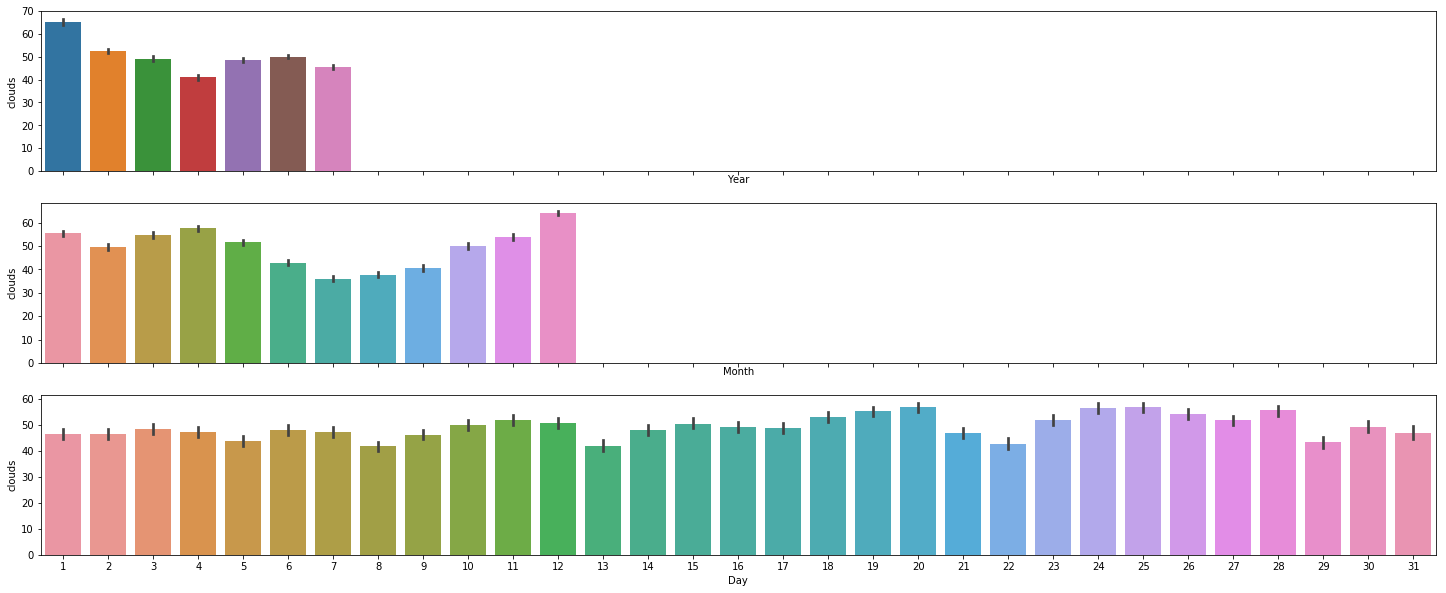

In [279]:
# Datetime data
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='Year', y='clouds', data=X_nume, ax=ax[0])
sns.barplot(x="Month", y='clouds',  data=X_nume, ax=ax[1])
sns.barplot(x='Day', y='clouds', data=X_nume, ax=ax[2])
plt.show()

In [324]:
df_final = pd.concat([X_cate, X_nume], axis=1, join='inner')
df_final.head()

,holiday,weather,temp,rain,clouds,Year,Month,Day,Hour
0,Regular,Clouds,288.28,0.0,40,2012,10,2,9
1,Regular,Clouds,289.36,0.0,75,2012,10,2,10
2,Regular,Clouds,289.58,0.0,90,2012,10,2,11
3,Regular,Clouds,290.13,0.0,90,2012,10,2,12
4,Regular,Clouds,291.14,0.0,75,2012,10,2,13


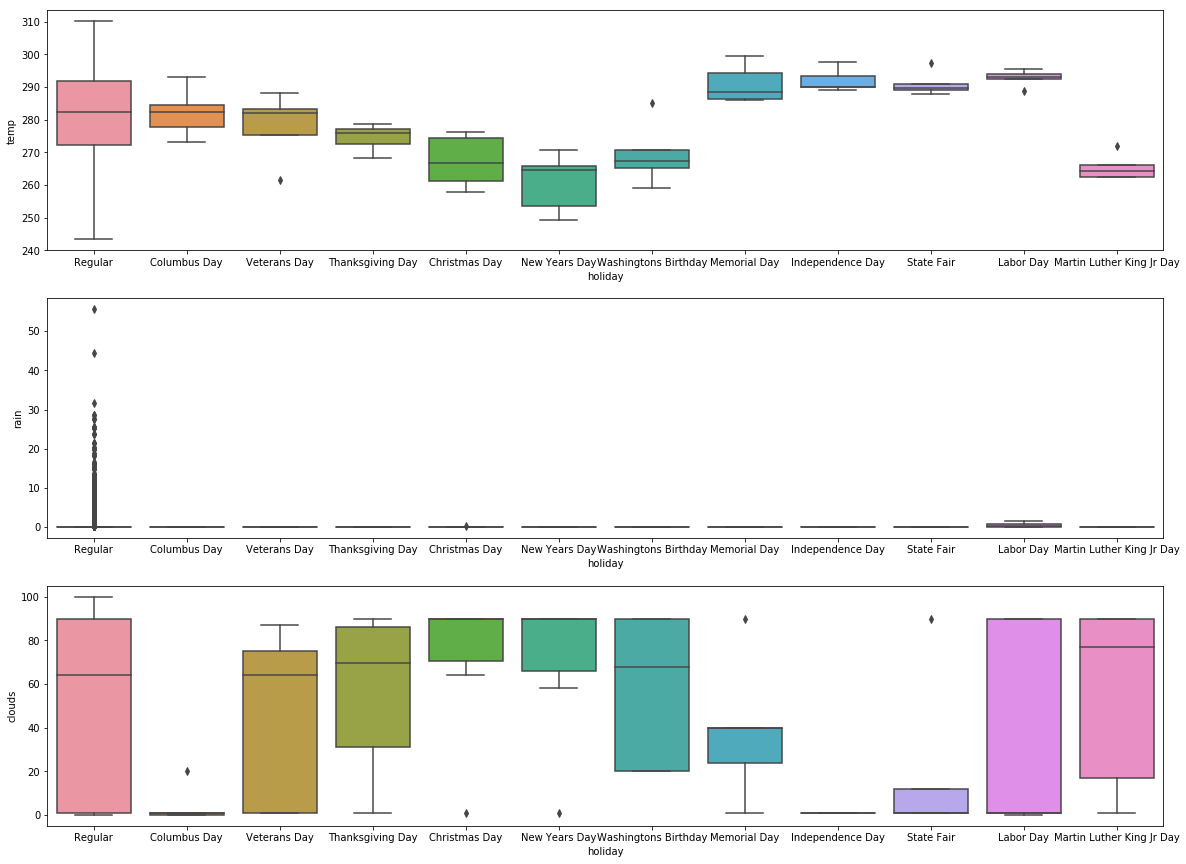

In [325]:
# visualizing correlation of holidays and independent variables
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.boxplot(x="holiday", y="temp", data=df_final, ax=ax[0])
sns.boxplot(x="holiday", y="rain", data=df_final, ax=ax[1])
sns.boxplot(x="holiday", y="clouds", data=df_final, ax=ax[2])
plt.show()

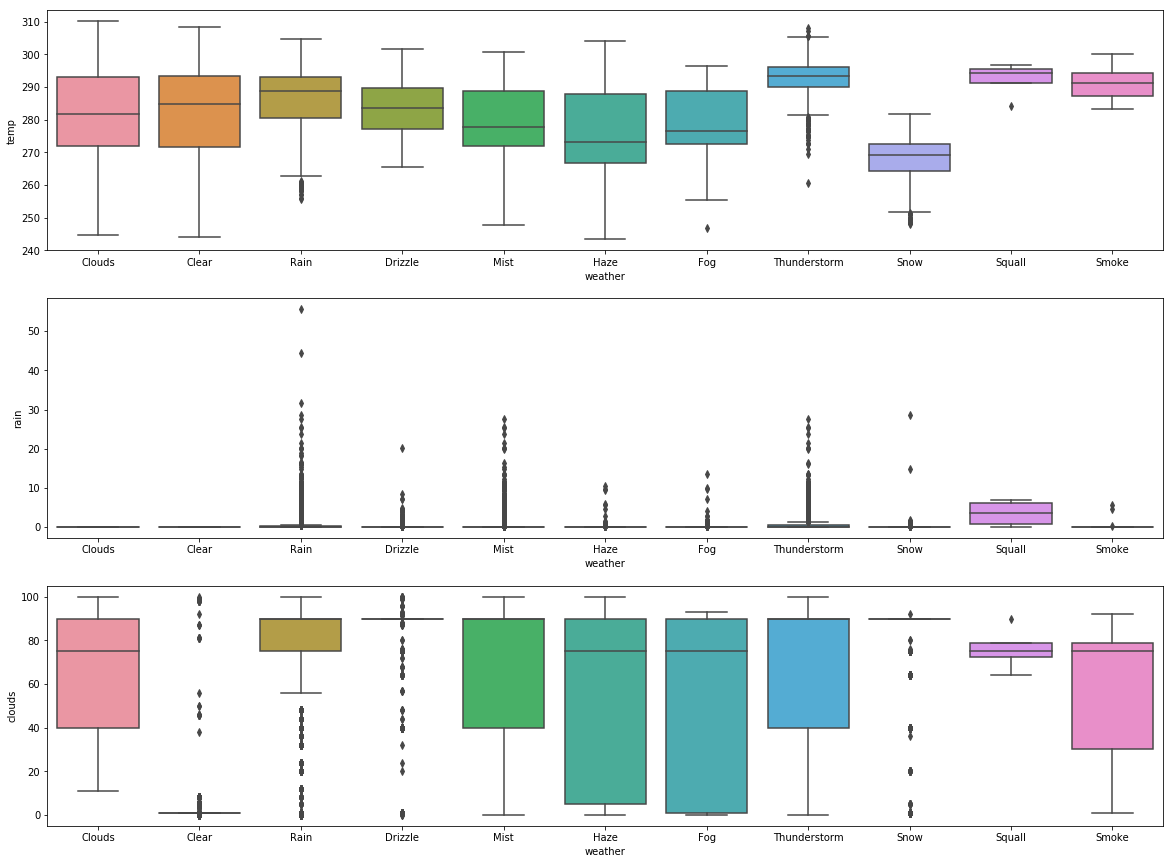

In [326]:
# visualizing correlation of weather and independent variables
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.boxplot(x="weather", y="temp", data=df_final, ax=ax[0])
sns.boxplot(x="weather", y="rain", data=df_final, ax=ax[1])
sns.boxplot(x="weather", y="clouds", data=df_final, ax=ax[2])
plt.show()

In [361]:
groupByCatego = df_final.iloc[:, 0:5]
groupByCatego.head()

,holiday,weather,temp,rain,clouds
0,Regular,Clouds,288.28,0.0,40
1,Regular,Clouds,289.36,0.0,75
2,Regular,Clouds,289.58,0.0,90
3,Regular,Clouds,290.13,0.0,90
4,Regular,Clouds,291.14,0.0,75


In [357]:
groupByCatego.groupby('holiday').describe()

temp                                           \
                             count        mean        std     min       25%   
holiday                                                                       
Christmas Day                  6.0  267.295000   7.798079  257.95  261.2275   
Columbus Day                   5.0  282.156200   7.519706  273.08  277.7200   
Independence Day               5.0  292.038000   3.482538  289.20  289.9500   
Labor Day                      7.0  292.934286   2.199158  288.78  292.4300   
Martin Luther King Jr Day      6.0  265.261667   3.638156  262.54  262.5400   
Memorial Day                   5.0  290.883400   5.863776  285.87  286.3700   
New Years Day                  6.0  260.915000   8.954748  249.36  253.4775   
Regular                    48132.0  281.267523  12.708578  243.39  272.2100   
State Fair                     5.0  290.984000   3.743826  287.97  289.0200   
Thanksgiving Day               6.0  274.583333   3.920294  268.24  272.5400   
Veterans Day                   5.0  278.110000  10.241509  261.68  275.4400   
Washingtons Birthday           5.0  269.507800   9.697329  258.96  265.3500   

                                                          rain            ...  \
                               50%       75%      max    count      mean  ...   
holiday                                                                   ...   
Christmas Day              266.745  274.3325  276.080      6.0  0.041667  ...   
Columbus Day               282.341  284.6200  293.020      5.0  0.000000  ...   
Independence Day           290.080  293.4100  297.550      5.0  0.000000  ...   
Labor Day                  293.170  294.0950  295.540      7.0  0.505714  ...   
Martin Luther King Jr Day  264.310  266.0800  271.790      6.0  0.000000  ...   
Memorial Day               288.380  294.3100  299.487      5.0  0.000000  ...   
New Years Day              264.715  265.9400  270.620      6.0  0.000000  ...   
Regular                    282.460  291.8100  310.070  48132.0  0.130428  ...   
State Fair                 289.690  290.8200  297.420      5.0  0.000000  ...   
Thanksgiving Day           275.780  277.2200  278.540      6.0  0.000000  ...   
Veterans Day               281.960  283.3500  288.120      5.0  0.000000  ...   
Washingtons Birthday       267.440  270.7300  285.059      5.0  0.000000  ...   

                                          clouds                              \
                             75%    max    count       mean        std   min   
holiday                                                                        
Christmas Day              0.000   0.25      6.0  70.833333  35.757051   1.0   
Columbus Day               0.000   0.00      5.0   4.400000   8.734987   0.0   
Independence Day           0.000   0.00      5.0   1.000000   0.000000   1.0   
Labor Day                  0.885   1.52      7.0  39.000000  47.707442   0.0   
Martin Luther King Jr Day  0.000   0.00      6.0  56.000000  43.776706   1.0   
Memorial Day               0.000   0.00      5.0  39.000000  32.680269   1.0   
New Years Day              0.000   0.00      6.0  69.833333  36.068916   1.0   
Regular                    0.000  55.63  48132.0  49.379747  39.011872   0.0   
State Fair                 0.000   0.00      5.0  21.000000  38.865151   1.0   
Thanksgiving Day           0.000   0.00      6.0  56.666667  37.564167   1.0   
Veterans Day               0.000   0.00      5.0  45.600000  41.518670   1.0   
Washingtons Birthday       0.000   0.00      5.0  57.600000  35.479572  20.0   

                                                      
                             25%   50%    75%    max  
holiday                                               
Christmas Day              70.50  90.0  90.00   90.0  
Columbus Day                0.00   1.0   1.00   20.0  
Independence Day            1.00   1.0   1.00    1.0  
Labor Day                   1.00   1.0  90.00   90.0  
Martin Luther King Jr Day  16.75  77.0  90

In [360]:
groupByCatego.groupby('weather').describe()

temp                                                    \
                count        mean        std     min       25%      50%   
weather                                                                   
Clear         13381.0  281.700337  14.347228  244.22  271.4900  284.890   
Clouds        15164.0  281.466101  13.148194  244.82  271.7875  281.690   
Drizzle        1821.0  283.795431   6.929380  265.49  277.0200  283.500   
Fog             912.0  279.415713   9.327352  246.74  272.4100  276.615   
Haze           1360.0  275.818581  12.978824  243.39  266.6800  273.020   
Mist           5950.0  279.476892  10.130460  247.65  272.0800  277.785   
Rain           5671.0  286.976918   8.054219  255.81  280.4350  288.800   
Smoke            20.0  290.927500   4.753122  283.29  287.1125  291.215   
Snow           2876.0  267.955188   5.719848  248.22  264.2725  269.180   
Squall            4.0  292.387500   5.562723  284.28  291.2025  294.270   
Thunderstorm   1034.0  292.716431   5.444606  260.54  289.9800  293.220   

                                   rain            ...                 \
                   75%     max    count      mean  ...     75%    max   
weather                                            ...                  
Clear         293.3100  308.43  13381.0  0.000000  ...  0.0000   0.00   
Clouds        292.9500  310.07  15164.0  0.000000  ...  0.0000   0.00   
Drizzle       289.7900  301.49   1821.0  0.157512  ...  0.0000  20.07   
Fog           288.6125  296.52    912.0  0.087007  ...  0.0000  13.46   
Haze          287.8475  303.93   1360.0  0.046868  ...  0.0000  10.60   
Mist          288.8600  300.82   5950.0  0.238336  ...  0.0000  27.57   
Rain          293.1500  304.72   5671.0  0.547849  ...  0.2500  55.63   
Smoke         294.2550  300.14     20.0  0.527000  ...  0.0000   5.59   
Snow          272.5800  281.72   2876.0  0.025223  ...  0.0000  28.70   
Squall        295.4550  296.73      4.0  3.482500  ...  6.2125   6.94   
Thunderstorm  296.1375  307.87   1034.0  1.189246  ...  0.5575  27.57   

               clouds                                                         
                count       mean        std   min    25%   50%    75%    max  
weather                                                                       
Clear         13381.0   1.547866   4.946021   0.0   1.00   1.0   1.00  100.0  
Clouds        15164.0  64.056120  25.529395  11.0  40.00  75.0  90.00  100.0  
Drizzle        1821.0  82.319605  20.807622   0.0  90.00  90.0  90.00  100.0  
Fog             912.0  51.497807  40.967176   0.0   1.00  75.0  90.00   93.0  
Haze           1360.0  58.670588  37.815948   0.0   5.00  75.0  90.00  100.0  
Mist           5950.0  65.956303  36.042976   0.0  40.00  90.0  90.00  100.0  
Rain           5671.0  72.599365  29.490141   0.0  75.00  90.0  90.00  100.0  
Smoke            20.0  53.350000  35.610872   1.0  30.25  75.0  78.75   92.0  
Snow           2876.0  81.465229  20.312665   1.0  90.00  90.0  90.00   92.0  
Squall            4.0  76.000000  10.677078  64.0  72.25  75.0  78.75   90.0  
Thunderstorm   1034.0  68.515474  31.081292   0.0  40.00  90.0  90.00  100.0  

[11 rows x 24 columns]

In [370]:
df_final.var()

temp       161.527931
rain         1.006973
clouds    1522.056896
Year         3.584587
Month       11.559094
Day         76.063710
Hour        48.168494
dtype: float64

In [373]:
encoded_data = pd.get_dummies(df_final)
encoded_data.head()

,temp,rain,clouds,Year,Month,Day,Hour,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,...,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
0,288.28,0.0,40,2012,10,2,9,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,289.36,0.0,75,2012,10,2,10,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,289.58,0.0,90,2012,10,2,11,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,90,2012,10,2,12,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,291.14,0.0,75,2012,10,2,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [385]:
corrs = encoded_data.corr()
corrs.head()

,temp,rain,clouds,Year,Month,Day,Hour,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,...,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
temp,1.000000,0.089920,-0.112885,0.137971,0.228255,0.022937,0.113465,-0.012265,0.000715,0.008635,...,0.010786,0.039474,-0.020195,-0.073011,-0.052767,0.164164,0.015493,-0.263801,0.007974,0.133433
rain,0.089920,1.000000,0.081485,-0.032646,0.028364,0.008011,-0.011376,-0.000986,-0.001323,-0.001323,...,-0.088011,0.005366,-0.005998,-0.014176,0.040390,0.151944,0.008054,-0.026390,0.030435,0.156254
clouds,-0.112885,0.081485,1.000000,-0.073091,-0.009518,0.048077,0.054183,0.006138,-0.011742,-0.012630,...,0.255034,0.167356,0.007568,0.040616,0.159540,0.217427,0.002078,0.207237,0.006218,0.072659
Year,0.137971,-0.032646,-0.073091,1.000000,-0.158973,0.012159,-0.007698,-0.004004,-0.004911,0.001546,...,-0.116495,0.040828,0.026414,0.019635,0.012402,0.016745,0.003630,-0.003683,-0.008483,0.048321
Month,0.228255,0.028364,-0.009518,-0.158973,1.000000,0.008595,0.001589,0.018028,0.010465,0.001477,...,-0.032736,0.019610,0.007685,-0.037392,0.026792,0.030922,-0.001241,-0.016857,-0.000019,0.020754


In [ ]:
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

In [ ]:
# Descriptive statistics
#df_long1.groupby('holiday').describe();

In [45]:
# Descriptive statistics
#df_long2.groupby('weather_main').describe();

In [ ]:
#crime.hvplot.line(x='Year', y='Violent Crime rate')


In [ ]:
# Visualizing traffic by holidays and weather
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='holiday', y='traffic_volume', data=df, ax=ax[0])
sns.barplot(x="weather_main", y='traffic_volume',  data=df, ax=ax[1])
plt.show()